In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

In [ ]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)
  
  for i in range(n):  
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()



In [ ]:
#Getting some samples 
!wget https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip -O Images.zip
!unzip Images.zip

--2022-08-22 14:45:12--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip [following]
--2022-08-22 14:45:12--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2003%20-%20Morphology/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250142 (244K) [application/zip]
Saving to: ‘Images.zip’

Images.zip          100%[===================>] 244.28K  --.-KB/s    in 0.004s  



#Mathematical Morphology

* Morphology (Nature): Branch of Biology that study the form and structure of animals and plants

* Morphology (Image Processing): Mathematical operations to extract image components based on pixel neighborhood. 

* Increase/Decrease Objects Size, Reduce Noise, Close or Open (GAPS)




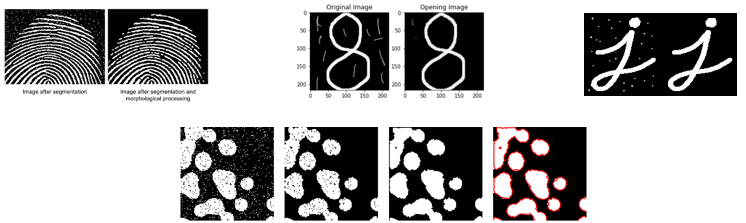

#Structuring Element (Kernel)

* Defines the shape of the structure to be applied
* The structure is slid through the image 
* Erosion or Dilate operations are applied
* The origin determines the pixel be changed 

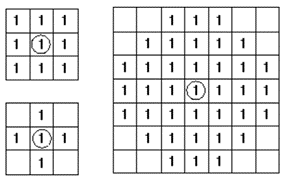

---



In [ ]:
#defining structuring elements (kernels)

#3x3
k_quad = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]], dtype=np.uint8)

print(k_quad.shape)

#Cross
k_cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]], dtype=np.uint8)

print(k_cross.shape)

#ellipse 
k_ellipse = np.array([[0,0,1,1,1,0,0],
                     [0,1,1,1,1,1,0],
                     [1,1,1,1,1,1,1],
                     [1,1,1,1,1,1,1],
                     [1,1,1,1,1,1,1],
                     [0,1,1,1,1,1,0],
                     [0,0,1,1,1,0,0]], dtype=np.uint8)

#ellipse 
print(k_ellipse.shape)



(3, 3)
(3, 3)
(7, 7)


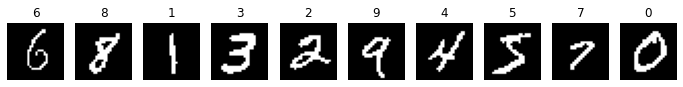

In [ ]:
filelist = glob.glob('Images/*mnist*')

digits = []
labels = []
for path in filelist: 
    dig = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    _,thresh = cv2.threshold(dig,127,255,cv2.THRESH_BINARY)
    digits.append(thresh)
    labels.append(path[-5])
plot_sidebyside(digits,labels,colormap='gray')

#Erosion (cv2.erode)
* Moves one´s to zero´s
* Binary ‘AND’ Operation 
* Reduces Noises and Contours

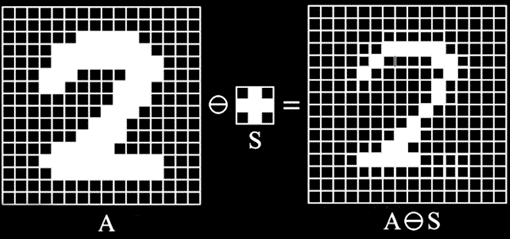


[[0 1 0]
 [1 1 1]
 [0 1 0]]


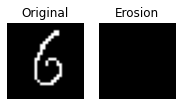

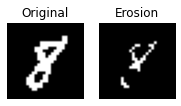

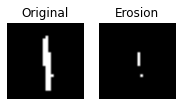

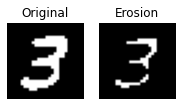

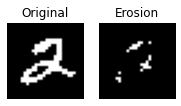

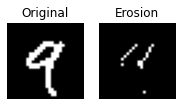

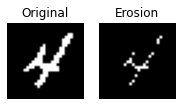

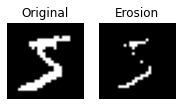

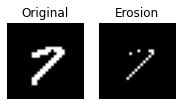

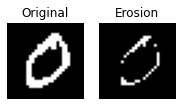

In [ ]:
kernel = k_cross
print(kernel)
for img in digits:    
    im_erode = cv2.erode(img,kernel)
    plot_sidebyside([img,im_erode],['Original','Erosion'],colormap='gray',figsize=(3,2))

#Dilation
* Moves zero’s to one’s
* Binary ‘OR’ Operation (HIT)
* Increases Objects, connect contours and fill holes.

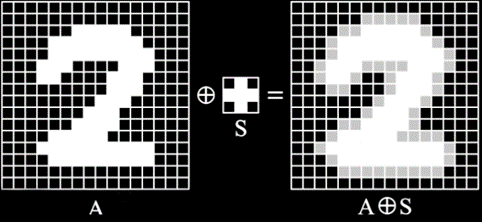

[[0 1 0]
 [1 1 1]
 [0 1 0]]


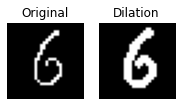

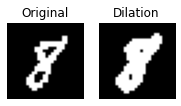

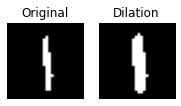

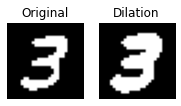

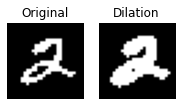

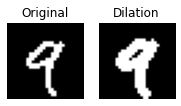

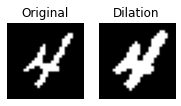

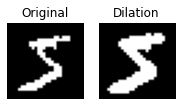

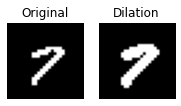

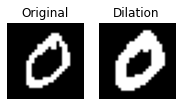

In [ ]:
kernel = k_cross
print(kernel)
for img in digits:    
    im_erode = cv2.dilate(img,kernel)
    plot_sidebyside([img,im_erode],['Original','Dilation'],colormap='gray',figsize=(3,2))

#Combined Morphological Operations (Opening, Closing)

  Combined Morphological Operations preserve the shape and size o large objects in the image

* Opening: Erode + Dilate
  * Removes small objects, noises, and thin lines

* Closing: Dilate + Erode
  * Fill small holes and connect segmented contours


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


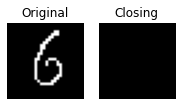

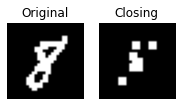

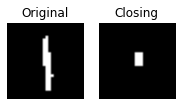

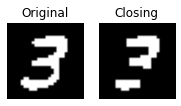

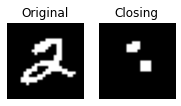

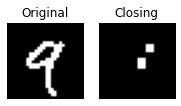

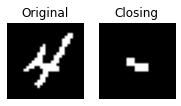

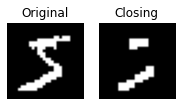

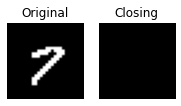

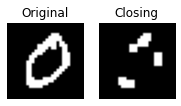

In [ ]:
kernel = np.ones((3,3))
print(kernel)

def morf_closing(img,kernel):
    im_erode = cv2.erode(img,kernel)
    im_close = cv2.dilate(im_erode,kernel)
    return im_close

for img in digits:    
    im_close = morf_closing(img,kernel)
    plot_sidebyside([img,im_close],['Original','Closing'],colormap='gray',figsize=(3,2))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


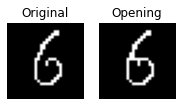

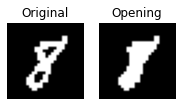

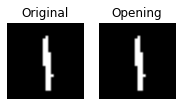

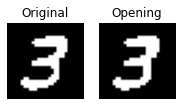

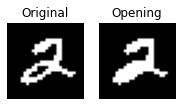

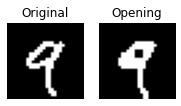

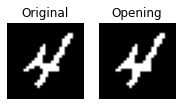

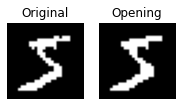

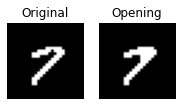

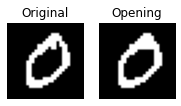

In [ ]:
kernel = np.ones((3,3))
print(kernel)

def morf_opening(img,kernel):
    im_dilate = cv2.dilate(img,kernel)
    im_open = cv2.erode(im_dilate,kernel)
    return im_open

for img in digits:    
    im_open = morf_opening(img,kernel)    
    plot_sidebyside([img,im_open],['Original','Opening'],colormap='gray',figsize=(3,2))

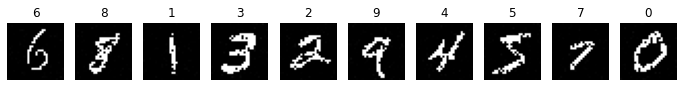

In [ ]:
#Adding some noise
noisy_digits = []
for img in digits:
    im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
    mean = -5
    sigma = 5
    noisy = cv2.randn(im,mean,sigma) # create the random distribution
    noisy = img + noisy
    noisy_digits.append(noisy)
plot_sidebyside(noisy_digits,labels,colormap='gray')

[[1. 1.]
 [1. 1.]]


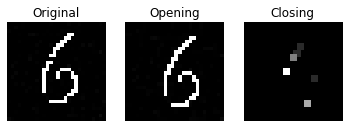

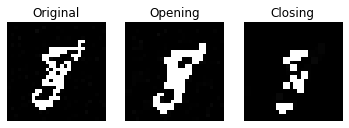

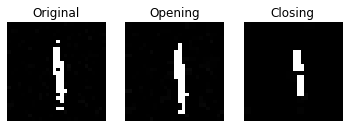

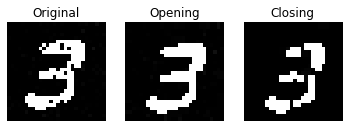

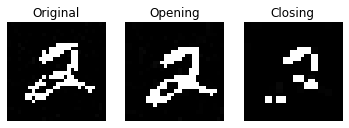

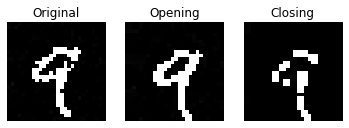

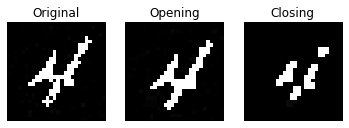

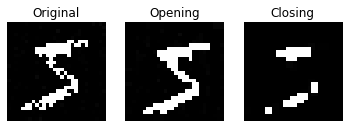

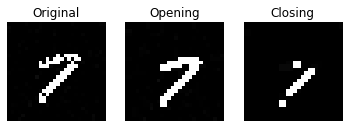

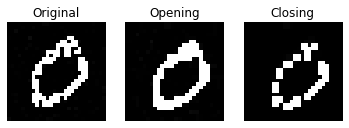

In [ ]:
kernel = np.ones((2,2))
print(kernel)
for img in noisy_digits:        
    im_open = morf_opening(img,kernel)
    im_close = morf_closing(img,kernel)    
    plot_sidebyside([img,im_open,im_close],['Original','Opening','Closing'],colormap='gray',figsize=(6,4))

#Line Detector with Morphology (Guided Implementation)

The code below creates a image with three different lines (Horizontal, Vertical and Diagonal)

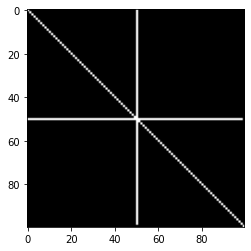

In [ ]:
im = np.zeros((100,100))

for x in range(99):
    #vertical
    im[x][50] = 255
    
    #horizontal
    im[50][x] = 255
    
#An usage example of cv2.line
im = cv2.line(im,(0,0),(99,99),(255,255,255),thickness=1)
    
plt.imshow(im,cmap='gray')
plt.show()

* How to create structuring elements to remove the lines?
* Which morphological operations are suitable for this problem?


In [ ]:
#implementation goes here
#will keep horizontal lines
kernel_h = np.array([[0,0,0],
                     [1,1,1],
                     [0,0,0]],dtype=np.uint8)

#will keep vertical lines
kernel_v = np.array([[0,1,0],
                     [0,1,0],
                     [0,1,0]],dtype=np.uint8)

#will keep diagonal lines
kernel_d = np.array([[1,0,0],
                     [0,1,0],
                     [0,0,1]],dtype=np.uint8)  
#.....

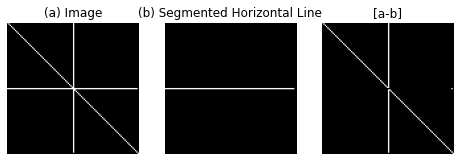

In [ ]:
#remove horizontal line appling kernel_h
tmp_img = cv2.erode(im,kernel_h)
diff = im - tmp_img
plot_sidebyside([im,tmp_img,diff],['(a) Image','(b) Segmented Horizontal Line','[a-b]'],colormap='gray',figsize=(8,4))

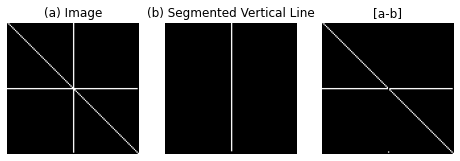

In [ ]:
#remove vertical line appling kernel_h
tmp_img = cv2.erode(im,kernel_v)
diff = im - tmp_img
plot_sidebyside([im,tmp_img,diff],['(a) Image','(b) Segmented Vertical Line','[a-b]'],colormap='gray',figsize=(8,4))

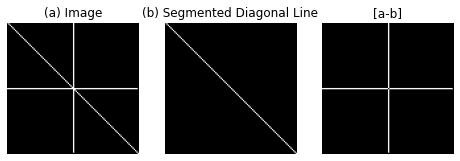

In [ ]:
#remove diagonal line appling kernel_h
tmp_img = cv2.erode(im,kernel_d)
diff = im - tmp_img
plot_sidebyside([im,tmp_img,diff],['(a) Image','(b) Segmented Diagonal Line','[a-b]'],colormap='gray',figsize=(8,4))

#Pratice 1 - Erosion and Dilation Implementation

Implement your own erode and dilate functions and compare them to cv2.erode() and cv2.dilate()



Erode is a binary 'and'. So, if the result is true and 

center is '1', it will be changed to zero

In [ ]:
#implementation goes here
#Insert black border surrounding imaging

im_b = np.insert(im/255,0,0,axis=0)
im_b = np.insert(im_b,-1,0,axis=0)

im_b = np.insert(im_b,-1,0,axis=1)
im_b = np.insert(im_b,0,0,axis=1)

res_img = im.copy()

for x in range(1,im_b.shape[0]-1):
  for y in range(1,im_b.shape[1]-1):

    roi = im_b[y-1:y+2,x-1:x+2]      
    result = np.sum(kernel) - np.sum(kernel * roi) 
    
    if result == 0:         
      res_img[y-1,x-1] = 255
    else:
      res_img[y-1,x-1] = 0

erode = cv2.erode(im,kernel)
plot_sidebyside([im,erode,res_img],['IM','Erode (CV2)','Erode (Own)'],colormap='gray')
#.....

ValueError: ignored

In [ ]:
im_b = np.insert(im/255,0,0,axis=0)
im_b = np.insert(im_b,-1,0,axis=0)

im_b = np.insert(im_b,-1,0,axis=1)
im_b = np.insert(im_b,0,0,axis=1)

res_img = im.copy()
kernel = kernel_v
for x in range(1,im_b.shape[0]-1):
  for y in range(1,im_b.shape[1]-1):
    
    
    roi = im_b[y-1:y+2,x-1:x+2]      
    result = np.sum(kernel * roi) 
    
    if result > 0:         
      res_img[y-1,x-1] = 255
    else:
      res_img[y-1,x-1] = 0
      


dilate = cv2.dilate(im,kernel)
plot_sidebyside([im,dilate,res_img],['IM','Dilate (CV2)','Dilate (Own)'],colormap='gray')

#Practice - Handwritten Segmentation

Try to segment the handwritten digits. At this point, don't worry about identifying the amount. You need only subtract the background as better you can.

Practice the skills learned in the past lessons:
   - Color Segmentation
   - Threshold
   - Filtering
   - Morphological Operators

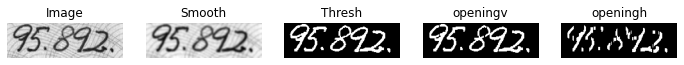

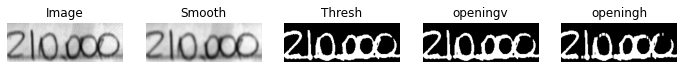

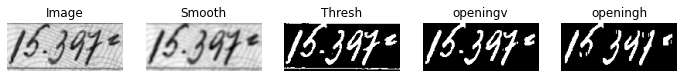

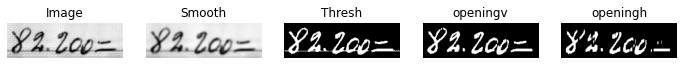

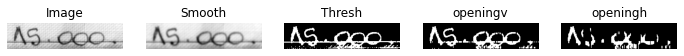

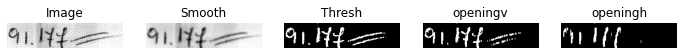

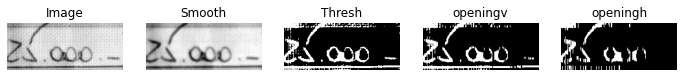

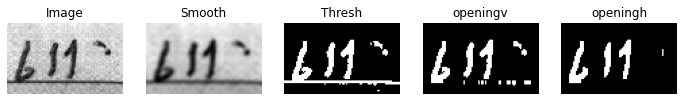

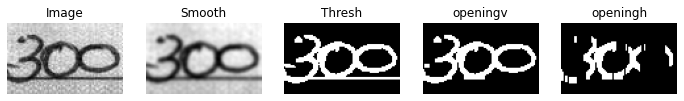

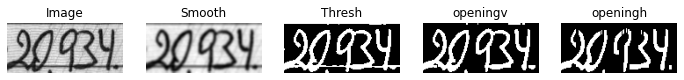

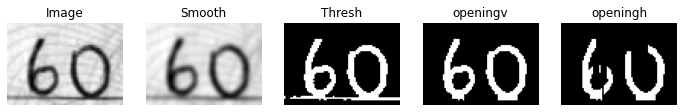

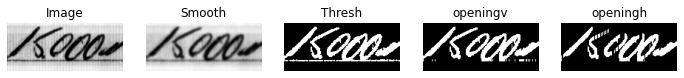

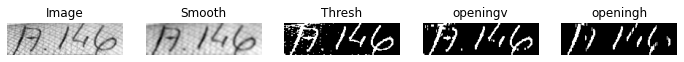

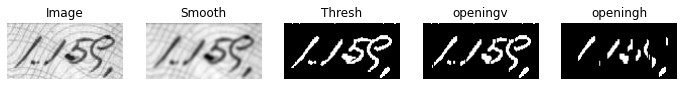

In [ ]:
paths = glob.glob('Images/*car*')

for path in paths:
  im = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

  filter = cv2.GaussianBlur(im,(5,5),0)

  _,thresh = cv2.threshold(filter,140,255,cv2.THRESH_BINARY_INV)
  _,thresh_otsu = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  
  kernel = np.array([[0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0],
                     [0,1,0]],dtype=np.uint8)

  cross = np.array([[0,1,0],
                     [0,1,0],
                     [0,1,0]],dtype=np.uint8)

  openingv = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, cross, iterations=1)
  openingh = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, cross, iterations=2)
  
  plot_sidebyside([im,filter,thresh_otsu,openingv,openingh],
                  ['Image','Smooth','Thresh','openingv','openingh'],colormap='gray',figsize=(12,4))
  





#Discussion and Final Remarks

In this lecture, we presented morphological operators that are useful to segment shapes from components of an image.

The primary operations are erosion and dilation, which consist of reducing or enlarging foreground contours by sliding a morphological kernel.

The combination of these operations (closing and opening) are well-known methods for image segmentation by reducing noise, affining contours, and removing undesired shapes.